Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         5
    Positive       1.00      1.00      1.00         4
     Neutral       0.00      0.00      0.00         0

    accuracy                           1.00         9
   macro avg       0.67      0.67      0.67         9
weighted avg       1.00      1.00      1.00         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

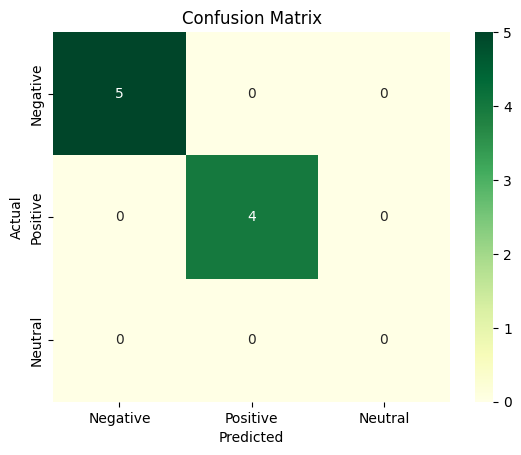

Text: Customer service was extremely helpful and resolved my issue quickly.
Predicted Sentiment: Positive
Confidence Score: 0.97

Text: I really appreciate the fast shipping and excellent packaging.
Predicted Sentiment: Positive
Confidence Score: 1.00

Text: The concert was amazing, and the band’s performance was outstanding!
Predicted Sentiment: Positive
Confidence Score: 1.00

Text: The app crashes frequently, making it almost unusable.
Predicted Sentiment: Negative
Confidence Score: 1.00

Text: The software update includes several bug fixes.
Predicted Sentiment: Negative
Confidence Score: 1.00

Text: The lecture was informative, but the presenter spoke too fast to follow.
Predicted Sentiment: Negative
Confidence Score: 1.00

Text: I had high hopes for this book, but it was just boring and predictable.
Predicted Sentiment: Negative
Confidence Score: 1.00

Text: The movie was a complete waste of time and money.
Predicted Sentiment: Negative
Confidence Score: 1.00

Text: The food was d

<ipython-input-18-580cc7a47b39>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


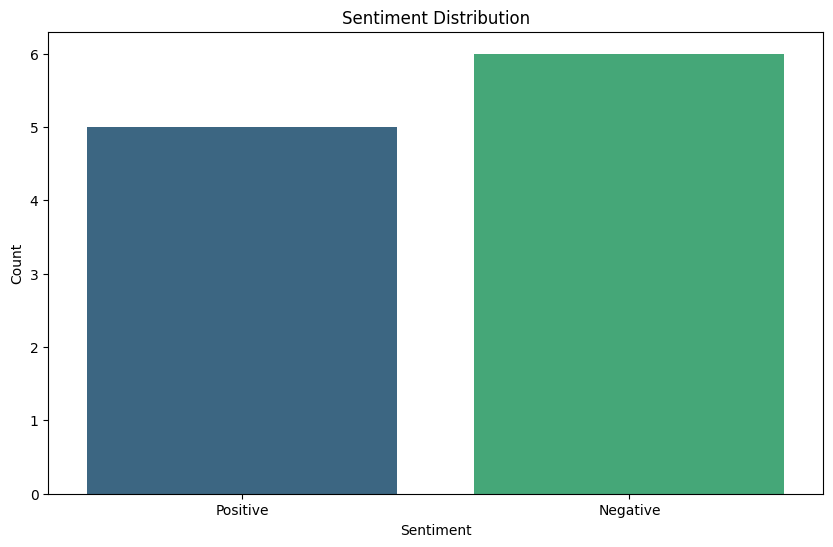

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a function to return predefined text data
def get_predefined_data():
    texts = [
        "I really appreciate the fast shipping and excellent packaging.",
        "The lecture was informative, but the presenter spoke too fast to follow.",
        "The software update includes several bug fixes.",
        "I absolutely love the new design; it's clean and user-friendly!",
        "The movie was a complete waste of time and money.",
        "Customer service was extremely helpful and resolved my issue quickly.",
        "I’m disappointed with the quality of this product; it broke after one week.",
        "The food was delicious, and the ambiance of the restaurant was perfect.",
        "I had high hopes for this book, but it was just boring and predictable.",
        "The concert was amazing, and the band’s performance was outstanding!",
        "The app crashes frequently, making it almost unusable."
    ]
    return pd.DataFrame({'text': texts})

# Get predefined data
df = get_predefined_data()

# Load pre-trained model and tokenizer
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
classifier = pipeline('sentiment-analysis', model=model_name)

# Define thresholds for neutral sentiment
neutral_lower_threshold = 0.4  # Adjust this value as needed
neutral_upper_threshold = 0.6  # Adjust this value as needed

# Predict the labels and confidence scores for the input data
results = classifier(df['text'].tolist())
df['label'] = [
    1 if result['label'] == 'POSITIVE' and result['score'] > neutral_upper_threshold
    else 0 if result['label'] == 'NEGATIVE' and result['score'] > neutral_upper_threshold
    else 2  # Neutral for scores between thresholds
    for result in results
]
df['confidence'] = [result['score'] for result in results]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.8, random_state=42)

# Predict the labels and confidence scores for the test set
test_results = classifier(X_test.tolist())
y_pred = [
    1 if result['label'] == 'POSITIVE' and result['score'] > neutral_upper_threshold
    else 0 if result['label'] == 'NEGATIVE' and result['score'] > neutral_upper_threshold
    else 2  # Neutral for scores between thresholds
    for result in test_results
]
confidence_scores = [result['score'] for result in test_results]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate classification report with specified labels
class_report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive', 'Neutral'], labels=[0, 1, 2])
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn', xticklabels=['Negative', 'Positive', 'Neutral'], yticklabels=['Negative', 'Positive', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display confidence scores
for text, pred, conf in zip(X_test, y_pred, confidence_scores):
    sentiment = 'Positive' if pred == 1 else 'Negative' if pred == 0 else 'Neutral'
    print(f"Text: {text}\nPredicted Sentiment: {sentiment}\nConfidence Score: {conf:.2f}\n")

# Plot sentiment distribution
df['sentiment'] = df['label'].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
